In [35]:
# Display plots inline and change default figure size
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D

# Data understanding and Preprocessing

In [36]:
data = pd.read_csv('../data/raw/NOW_AssignmentData.csv')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298745 entries, 0 to 298744
Data columns (total 20 columns):
RowId                          298745 non-null int64
UID                            298745 non-null object
DisplayTime                    298745 non-null object
LandingPage                    298745 non-null object
TrafficSource                  163537 non-null object
FirstSessionStartTime          298745 non-null object
TotalVisits                    298745 non-null int64
PreviousSessionStartTime       100836 non-null object
CurrentSessionStartTime        298745 non-null object
ClicksBeforeThisDisplay        298745 non-null int64
PreviousDisplaysThisSession    298745 non-null int64
PreviousDisplayTime            115637 non-null object
CurrentURL                     298745 non-null object
Country                        289908 non-null object
MessageType                    298745 non-null object
ResponsePromise                252350 non-null object
DisplayReason                

In [38]:
data.shape

(298745, 20)

In [39]:
data.head(5)

,RowId,UID,DisplayTime,LandingPage,TrafficSource,FirstSessionStartTime,TotalVisits,PreviousSessionStartTime,CurrentSessionStartTime,ClicksBeforeThisDisplay,PreviousDisplaysThisSession,PreviousDisplayTime,CurrentURL,Country,MessageType,ResponsePromise,DisplayReason,CallCenterStatus,DeviceType,Contact
0,1,8f573a6d9e78b2ce7a869084c81249f9,2016-04-08 15:20:17,hidden.org/,NaN,2016-04-08 15:20:05,1,NaN,2016-04-08 15:20:05,3,0,NaN,hidden.org/kcpov/scxth,stnzd,id6,1 minute,id2,Open,desktop,0
1,2,2e6c7e102a53f2dfffb457426c1e4392,2016-04-25 18:33:58,hidden.org/kcpov,NaN,2016-04-25 18:29:39,1,NaN,2016-04-25 18:29:39,4,0,NaN,hidden.org/kcpov/ozstv,stnzd,id8,1 minute,id3,Open,tablet,0
2,3,837e036c31c3c2f9cba8baa0807dd59f,2016-03-02 13:31:31,hidden.org/pvynf,SEM,2016-03-02 13:25:35,1,NaN,2016-03-02 13:25:35,3,0,NaN,hidden.org/bgalf/qniyh/niywb/ljosa,stnzd,id4,1 minute,id3,Open,mobile,0
3,4,1059589e0ede8626948f74d8f82915d6,2016-04-29 12:21:24,hidden.org/,NaN,2016-04-29 12:18:04,1,NaN,2016-04-29 12:18:04,3,0,NaN,hidden.org/pvynf/qlyhf,stnzd,id8,1 minute,id3,Open,mobile,0
4,5,bf9b121491f2e7ef9d5ad9eb3a66511c,2016-04-16 09:00:56,hidden.org/,SEM,2016-04-16 09:00:05,1,NaN,2016-04-16 09:00:05,3,0,NaN,hidden.org/kcpov/orkbv,stnzd,id8,1 minute,id3,Open,tablet,0


In [40]:
data.describe()

,RowId,TotalVisits,ClicksBeforeThisDisplay,PreviousDisplaysThisSession,Contact
count,298745.000000,298745.000000,298745.000000,298745.000000,298745.000000
mean,149373.000000,5.832566,4.816077,0.860818,0.018815
std,86240.397422,76.201176,2.941553,1.586031,0.135873
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,74687.000000,1.000000,3.000000,0.000000,0.000000
50%,149373.000000,1.000000,3.000000,0.000000,0.000000
75%,224059.000000,2.000000,6.000000,1.000000,0.000000
max,298745.000000,3652.000000,126.000000,16.000000,1.000000


In [41]:
data.isnull().sum()

RowId                               0
UID                                 0
DisplayTime                         0
LandingPage                         0
TrafficSource                  135208
FirstSessionStartTime               0
TotalVisits                         0
PreviousSessionStartTime       197909
CurrentSessionStartTime             0
ClicksBeforeThisDisplay             0
PreviousDisplaysThisSession         0
PreviousDisplayTime            183108
CurrentURL                          0
Country                          8837
MessageType                         0
ResponsePromise                 46395
DisplayReason                       0
CallCenterStatus                    0
DeviceType                       1963
Contact                             0
dtype: int64

In [49]:
def get_ratio(dic, cc1):
   if cc1 in dic:
        return dic[cc1]
   return 0.0

def enrich_with_time_features(data_df, col_name):
    data_df[col_name + '_dt'] = pd.to_datetime(data_df[col_name], format = '%Y-%m-%d %H:%M:%S')
    data_df[col_name + '_dow'] = data_df[col_name + '_dt'].dt.dayofweek
    data_df[col_name + '_hour'] = data_df[col_name + '_dt'].dt.hour
    data_df[col_name + '_month'] = data_df[col_name + '_dt'].dt.month


def enrich_with_ratio_features(data_df, col_name):
    dic = data_df.groupby(col_name).Contact.mean().to_dict()
    data_df[col_name + 'Ratio'] = \
    data_df[col_name].apply(lambda x: get_ratio(dic, x))
    
def preprocessing(data_df):
    for col in data_df.select_dtypes(include=['object']).columns:
        if 'UID' not in col and 'Time' not in col:
            enrich_with_ratio_features(data_df, col)
        elif 'Time' in col:
            enrich_with_time_features(data_df, col)
    data_df.fillna(-1, inplace=True)
    
    
    X = data_df.select_dtypes(include=[np.number])
    X = X.drop(['RowId', 'Contact'], axis=1)
    
    X_train = X[data_df.DisplayTime_month == 3]
    y_train = data_df[data_df.DisplayTime_month == 3].Contact
    X_valid = X[data_df.DisplayTime_month == 4]
    y_valid = data_df[data_df.DisplayTime_month == 4].Contact
    
    return X_train, y_train, X_valid, y_valid

In [50]:
X_train, y_train, X_valid, y_valid = preprocessing(data)

In [132]:
data.DisplayTime_dt.describe()

count                  298745
unique                 273806
top       2016-03-10 16:04:52
freq                        5
first     2016-03-01 07:00:07
last      2016-04-30 17:59:53
Name: DisplayTime_dt, dtype: object

In [67]:
y_train.groupby(y_train).count()

Contact
0    154196
1      3111
dtype: int64

In [72]:
len(y_train[y_train == 1]) * 1.0/len(y_train)

0.019776615153807523

In [73]:
y_valid.groupby(y_valid).count()

Contact
0    138928
1      2510
dtype: int64

In [74]:
len(y_valid[y_valid == 1]) * 1.0/len(y_valid)

0.01774629166136399

In [43]:
from scipy.stats import pearsonr

def correlation_between_feat(feat_df):
    corr_mat = feat_df.corr()
    plt.figure(figsize = (10,10))
    im = plt.imshow(corr_mat, interpolation='nearest')
    plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
    plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
    plt.colorbar()
    plt.savefig("corr_feat.png", transparent=True)

    plt.show()
    
    
def correlation_with_label(feat_df, label_df):
    keys = []
    scores = []
    
    for col in feat_df.select_dtypes(include=['int64', 'float64']).columns:
        keys.append(col)
        scores.append(abs(pearsonr(feat_df[col], label_df)[0]))
    
    plt.figure(figsize = (14,6))
    plt.plot(scores)
    plt.xticks(range(len(scores)), keys, rotation=90)
    plt.ylabel("Pearson correlation with label")
    plt.xlabel("Features")
    plt.savefig("corr_label.png", transparent=True)

    plt.show()

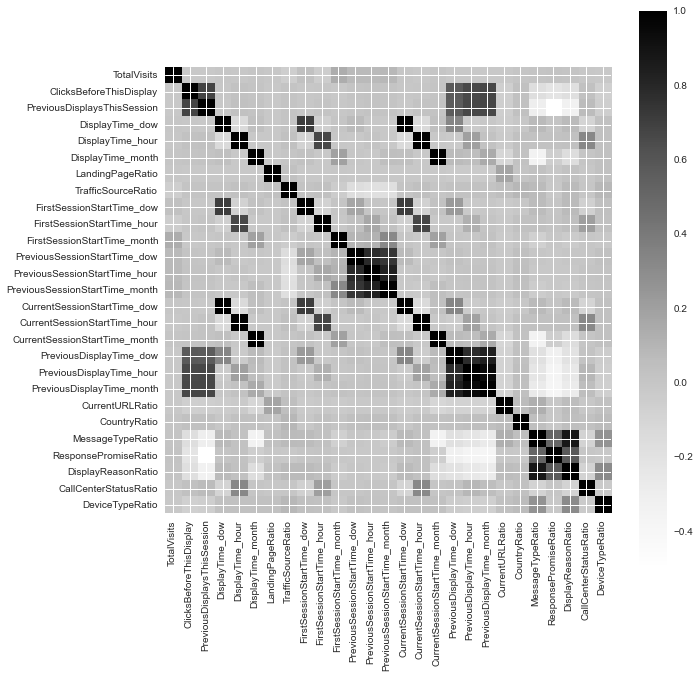

In [76]:
correlation_between_feat(X)

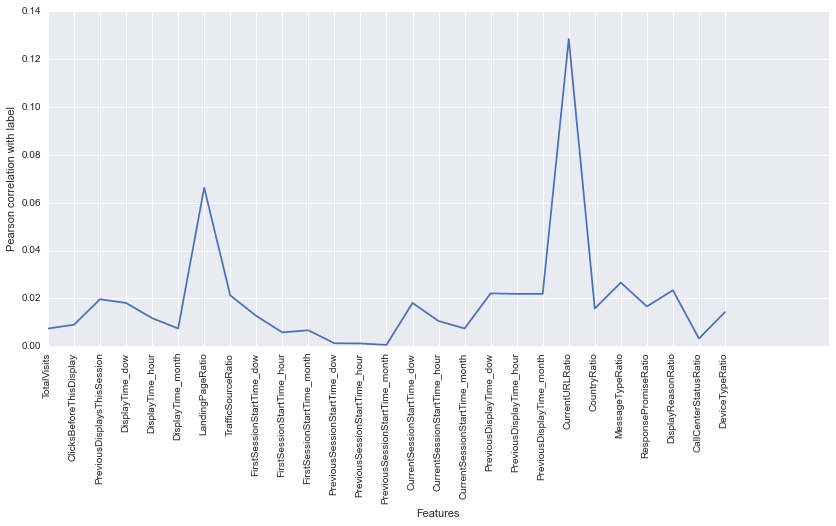

In [46]:
correlation_with_label(X, y)

# Sampling

In [120]:
over_ratio = 10
under_ratio = 0.6
indices_0 = y_train[y_train == 0].index
indices_1 = y_train[y_train == 1].index

sample_indices_1 = np.random.choice(indices_1, over_ratio * indices_1.shape[0], replace=True)
sample_indices_0 = np.random.choice(indices_0, under_ratio/(1-under_ratio) * sample_indices_1.shape[0], replace=False)

sample_indices = np.concatenate((sample_indices_0, sample_indices_1))

X_train_sample = X_train.ix[sample_indices]
y_train_sample = y_train.ix[sample_indices]

# reset index starting from 0
X_train_sample = X_train_sample.reset_index(drop=True)
y_train_sample = y_train_sample.reset_index(drop=True)

/Users/zhaofeng/.virtualenvs/env_ds/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [121]:
print y_train_sample.groupby(y_train_sample).count()

Contact
0    46664
1    31110
dtype: int64


# Training and Evaluation

In [122]:
from sklearn import metrics
import csv
from scores_analyzer import scores_analyzer

def csv_writer(data, path):
    with open(path, "wb") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for line in data:
            writer.writerow(line)

def classification(classifier, X_train, X_valid, y_train, y_valid, score_instances_path):
    preds = classifier.fit(X_train, y_train).predict(X_valid)
    precision = metrics.precision_score(y_valid, preds)
    recall = metrics.recall_score(y_valid, preds)
    pred_probas = classifier.fit(X_train, y_train).predict_proba(X_valid)
    f1 = metrics.f1_score(y_valid, preds)
    print "Precision: " + str(precision)
    print "Recall:    " + str(recall)
    print "F1 score:  " + str(f1)


    XY_valid = np.concatenate((X_valid, pd.DataFrame(y_valid)), axis=1)
    XYP_valid = np.concatenate((XY_valid, pred_probas), axis=1)
    csv_writer(XYP_valid, score_instances_path)
    
def roc_plot(classifier, X_train, X_test, y_train, y_test):
    pred_probas = classifier.fit(X_train, y_train).predict_proba(X_test)
    fprs, tprs, _ = metrics.roc_curve(y_test,pred_probas[:,1])
    roc_auc = metrics.auc(fprs, tprs)

    plt.figure()
    plt.plot(fprs, tprs, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    
def precision_recall_plot(classifier, X_train, X_test, y_train, y_test):
    pred_probas = classifier.fit(X_train, y_train).predict_proba(X_test)
    precisions, recalls, _ = metrics.precision_recall_curve(y_test,pred_probas[:,1])
    average_precision = metrics.average_precision_score(y_test,pred_probas[:,1])
    
    plt.figure()
    plt.plot(recalls, precisions, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()
    
def feature_importance_plot(forest, X, y, names):
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (indices[f], names[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [123]:
from sklearn.ensemble import RandomForestClassifier

print "\nRandomForest Classifier"
cforest = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_split=50, min_samples_leaf=5, \
                                 random_state=0, verbose=1, n_jobs=-1)
classification(cforest, X_train_sample, X_valid, y_train_sample, y_valid, 'forest.csv')

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished



RandomForest Classifier
Precision: 0.0736117592161
Recall:    0.251394422311
F1 score:  0.113878361307


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


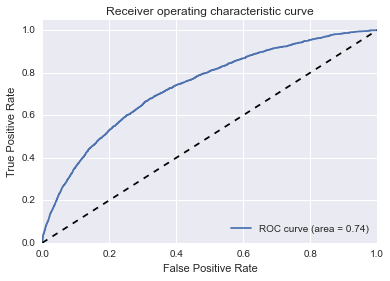

In [124]:
roc_plot(cforest, X_train_sample, X_valid, y_train_sample, y_valid)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


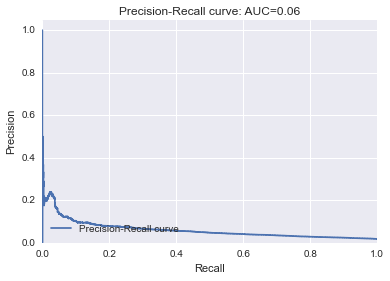

In [125]:
precision_recall_plot(cforest, X_train_sample, X_valid, y_train_sample, y_valid)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished


Feature ranking:
20. CurrentURLRatio (0.300960)
6. LandingPageRatio (0.077419)
9. FirstSessionStartTime_hour (0.052940)
4. DisplayTime_hour (0.050590)
15. CurrentSessionStartTime_hour (0.049662)
1. ClicksBeforeThisDisplay (0.041571)
22. MessageTypeRatio (0.039120)
0. TotalVisits (0.038649)
8. FirstSessionStartTime_dow (0.033898)
12. PreviousSessionStartTime_hour (0.030942)
7. TrafficSourceRatio (0.030584)
3. DisplayTime_dow (0.030356)
14. CurrentSessionStartTime_dow (0.030286)
24. DisplayReasonRatio (0.026568)
18. PreviousDisplayTime_hour (0.022337)
21. CountryRatio (0.021856)
26. DeviceTypeRatio (0.021063)
11. PreviousSessionStartTime_dow (0.020632)
2. PreviousDisplaysThisSession (0.018926)
13. PreviousSessionStartTime_month (0.015034)
10. FirstSessionStartTime_month (0.013741)
17. PreviousDisplayTime_dow (0.013357)
23. ResponsePromiseRatio (0.011854)
19. PreviousDisplayTime_month (0.005076)
25. CallCenterStatusRatio (0.002579)
16. CurrentSessionStartTime_month (0.000000)
5. DisplayTi

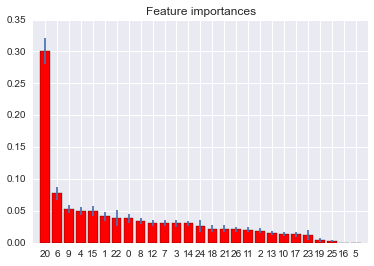

In [126]:
feature_importance_plot(cforest, X_train_sample, y_train_sample, X_train_sample.columns)

In [127]:
import xgboost as xgb

print "\nXGBoost Classifier"

xgboost = xgb.XGBClassifier(max_depth=15, n_estimators=100, learning_rate=0.1, colsample_bytree=0.5, min_child_weight=5,\
                            silent=False, seed=0)
classification(xgboost, X_train_sample, X_valid, y_train_sample, y_valid, 'xgboost.csv')


XGBoost Classifier
Precision: 0.0601968413825
Recall:    0.209561752988
F1 score:  0.0935277382646


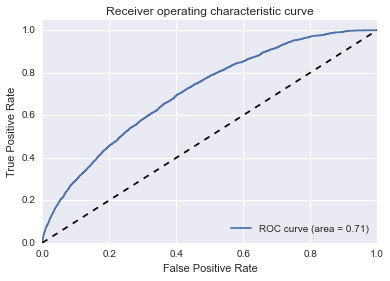

In [128]:
roc_plot(xgboost, X_train_sample, X_valid, y_train_sample, y_valid)

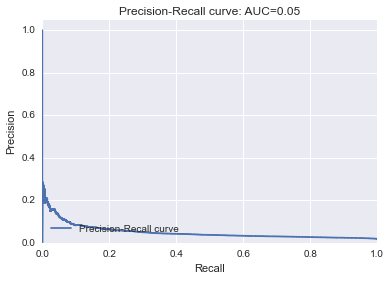

In [129]:
precision_recall_plot(xgboost, X_train_sample, X_valid, y_train_sample, y_valid)